Importing the dependencies

In [33]:
# Dataset: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and preprocessing

In [34]:
# Loading the csv dataset to the pandas Dataframe
gold_dataset = pd.read_csv('gld_price_data.csv')

In [35]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [36]:
gold_dataset.shape

(2290, 6)

In [37]:
gold_dataset.drop(columns= 'Date', axis= 1, inplace= True)

In [38]:
gold_dataset.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [39]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [40]:
gold_dataset.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [41]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**CORRELATION**

In [42]:
correlation = gold_dataset.corr()

<Axes: >

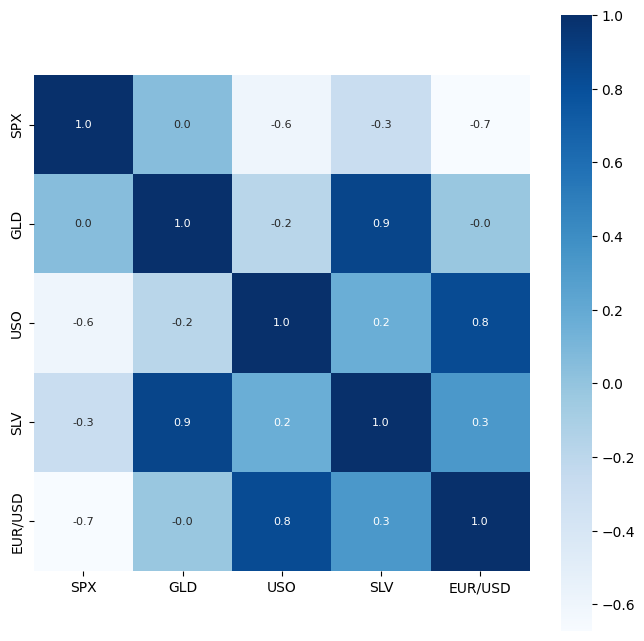

In [43]:
plt.figure(figsize= (8, 8))
sns.heatmap(correlation, cbar= True, square= True, fmt='0.1f', annot= True, annot_kws= {'size' : 8}, cmap= 'Blues')

In [44]:
# Correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_11408\1830681105.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color= 'Green')


<Axes: xlabel='GLD', ylabel='Density'>

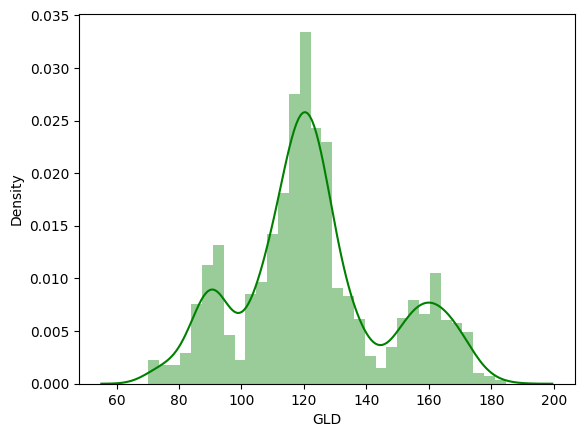

In [45]:
# Check the distribution of the gold price
sns.distplot(gold_dataset['GLD'], color= 'Green')

Splitting the target and the features

In [47]:
X = gold_dataset.drop(columns= 'GLD', axis =1)
Y = gold_dataset['GLD']

In [48]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [49]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [51]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

Model Training

In [55]:
regressor = RandomForestRegressor(n_estimators= 100)

In [56]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [60]:
# Test data prediction
test_data_prediction = regressor.predict(X_test)

In [61]:
print(test_data_prediction)

[168.56869921  82.19129969 115.91789993 127.8697009  120.7161012
 154.75919768 150.19339873 126.09380077 117.64689881 125.91530095
 116.44040057 171.63730136 142.02989887 167.57789869 115.13770018
 117.53850034 138.84900208 169.68310006 158.95040234 157.02079885
 155.00739998 124.9610005  175.13769954 157.33680253 125.15960048
  93.75649994  78.34019984 120.62910007 119.03199931 167.50570072
  88.11520002 125.00239975  91.10640091 117.68290008 121.19559951
 136.86960118 115.48940133 115.4402009  147.40400006 107.26550097
 104.88140255  87.13449808 126.48270054 117.92299989 152.05819916
 119.57719995 108.45799984 108.1436982   93.24280037 126.9135983
  74.11030073 113.71289937 121.38579998 111.20209902 118.87999918
 120.31459919 158.69819999 166.80560133 147.32079696  85.77839855
  94.42360035  86.91059877  90.38820033 118.96290067 126.45090032
 127.39420006 169.83239971 122.32659927 117.33569878  98.05920046
 168.78210178 142.81709903 131.8089029  121.22880211 121.58039934
 119.5540006

In [66]:
# R SQUARED ERROR
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R SQUARED ERROR:", error_score)

R SQUARED ERROR: 0.9894626516849626


COMPARE THE ACTUAL VALUES AND THE PREDICTED VALUES IN A PLOT

In [67]:
Y_test = list(Y_test)

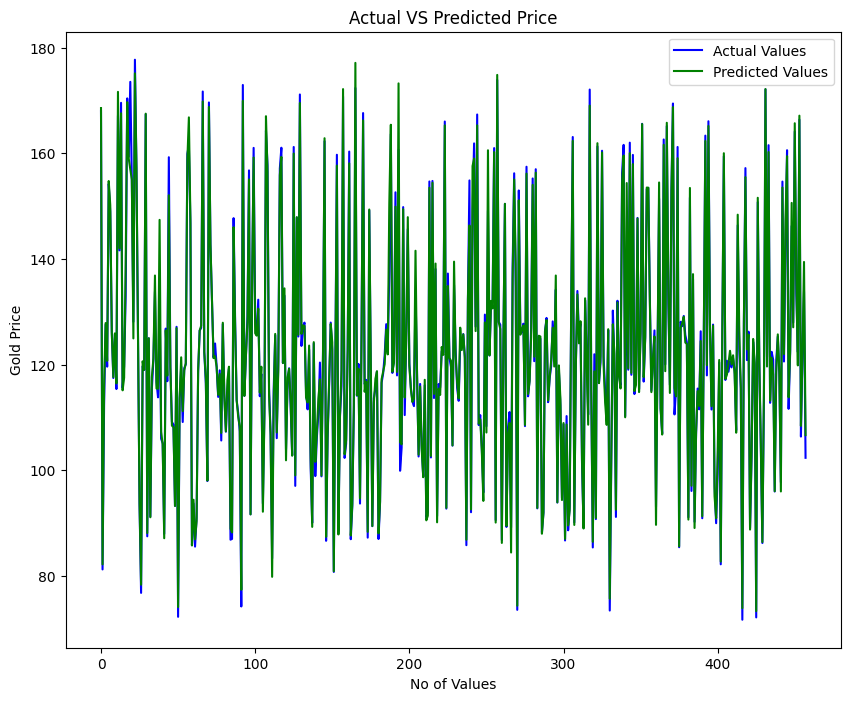

In [72]:
plt.figure(figsize= (10, 8))
plt.plot(Y_test, color= 'blue', label= "Actual Values")
plt.plot(test_data_prediction, color= 'green', label= 'Predicted Values')
plt.title("Actual VS Predicted Price")
plt.xlabel("No of Values")
plt.ylabel("Gold Price")
plt.legend()